# Feature Extraction Testing

This file contains the testing of feature extractions. This is where prod_feature_extraction.py code was tested for the finalized functions.

## Define feature extraction functions


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob
import os
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

def bin_spatial(img, size=(32, 32)):
    """
    This function takes as input: an image called 'img' and a tuple of (x,y) called 'size'.
    
    It returns 'img' scaled to dimensions x by y as a xy by 1 array.
    """
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features
 
def color_hist(img, nbins=32, bins_range=(0, 256)):
    """
    This function takes as input: a three channel image called 'img', a number of bins called 'nbins' and a range for the
    bins called 'bin_range'.
    
    It returns 3 histograms, one for each channel of 'img', as a numpy array.
    """
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features,hog_image=hog(img, orientations=orient,pixels_per_cell=(pix_per_cell,pix_per_cell),
        cells_per_block=(cell_per_block,cell_per_block), transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features=hog(img, orientations=orient,pixels_per_cell=(pix_per_cell,pix_per_cell),
        cells_per_block=(cell_per_block,cell_per_block), transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        
        return features
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256), hog_params=(9,9,2),hog_size=(32,32)):
    """
    This function takes as input: a list of image paths called 'imgs', a color space to convert images to
    from the following list, ['RGB','HSV','LUV','HLS','YUV'], called 'cspace', a tuple of x and y values
    to scale images to called 'spatial_size', a number to bins for a histogram called 'hist_bins' and a tuple
    for the start and stop of a histogram called 'hist_range'.
    
    It returns a list of numpy arrays of bin features and color histogram features for each image in 
    'imgs'
    """
    # Create a list to append feature vectors to
    features = []
    for img_path in imgs:
        img=mpimg.imread(img_path)
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        else: 
            feature_image = np.copy(img) 
        # apply color conversion if other than 'RGB'
        bin_features=bin_spatial(feature_image,spatial_size)
        color_hist_feature=color_hist(feature_image,nbins=hist_bins,bins_range=hist_range)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray=cv2.resize(gray, hog_size)
        # Define HOG parameters
        orient = 9
        pix_per_cell = 8
        cell_per_block = 2
        # Call our function with vis=True to see an image output
        hog_features = get_hog_features(gray, orient, 
                                pix_per_cell, cell_per_block, 
                                vis=True, feature_vec=False)
        features.append(np.concatenate((bin_features,color_hist_feature,hog_features)))
    return features

## Feature Extraction Parameter testing

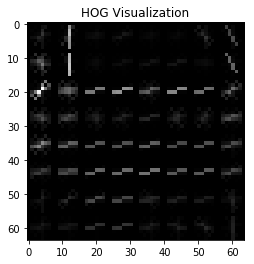

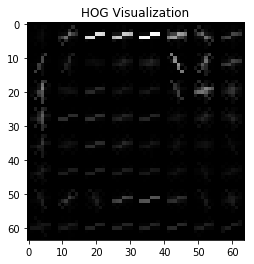

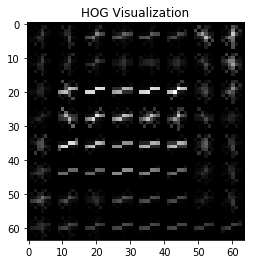

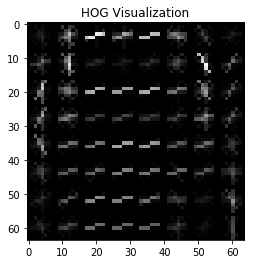

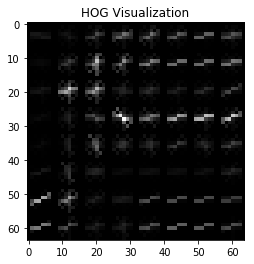

In [58]:

images = glob.glob('vehicles/**/*.png')
for img_path in images[0:5]:
    image=mpimg.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray=cv2.resize(gray, (64,64))
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


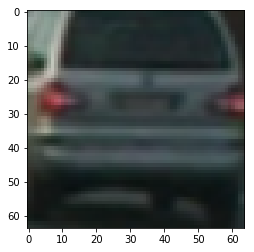

359.241


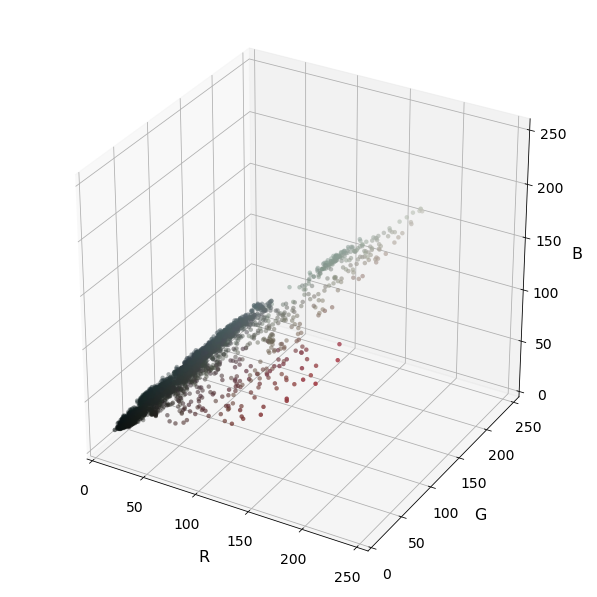

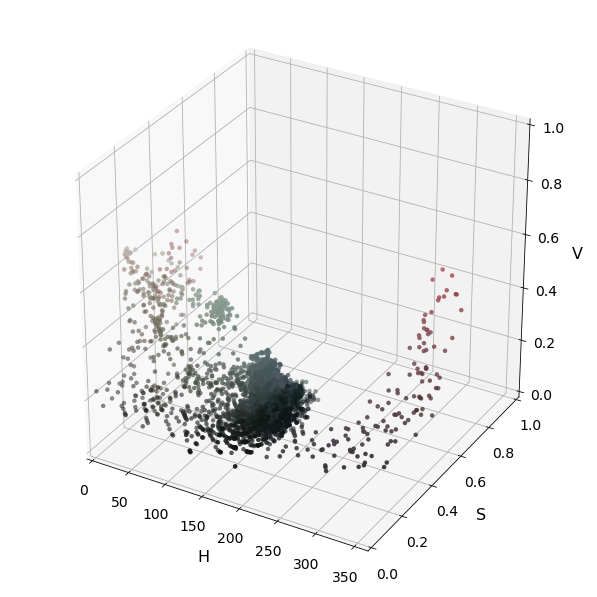

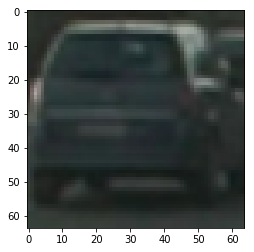

340.0


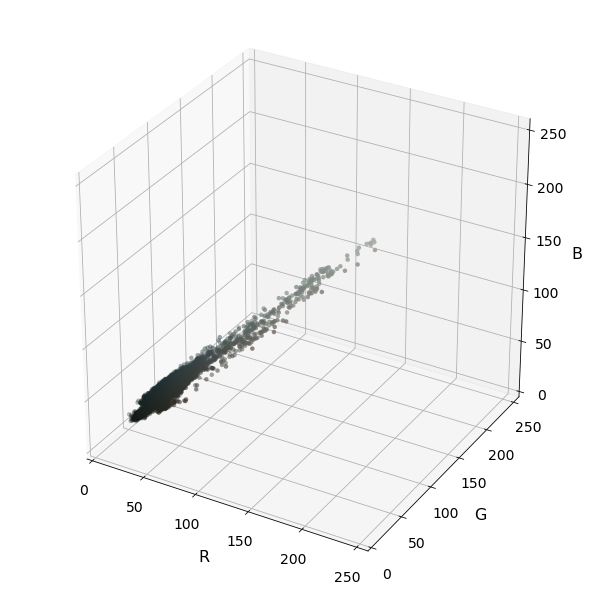

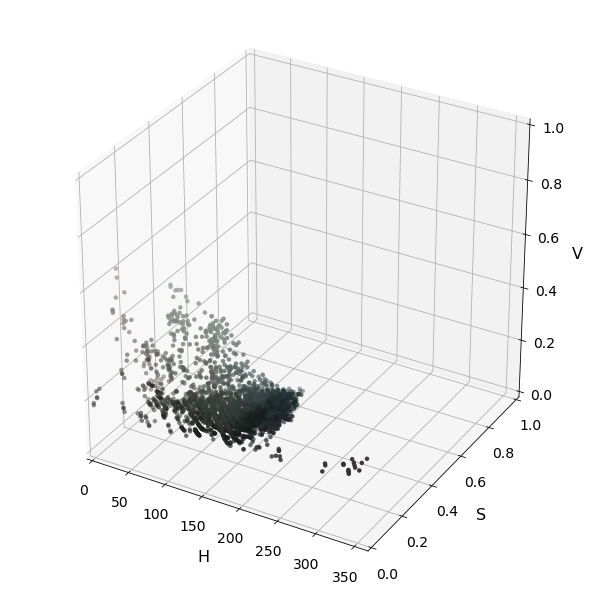

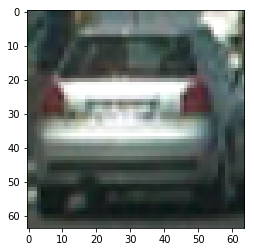

358.537


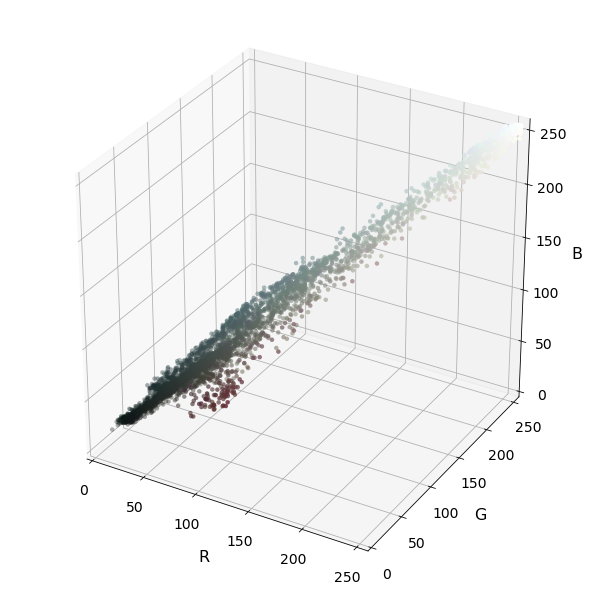

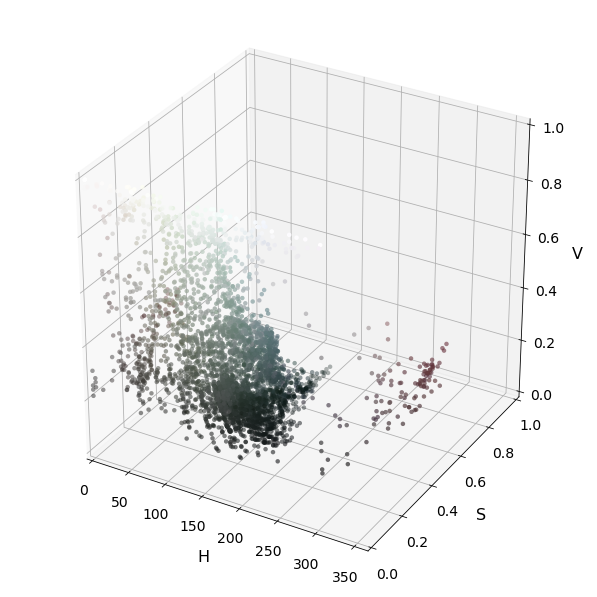

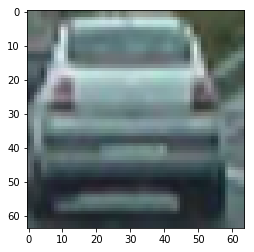

322.5


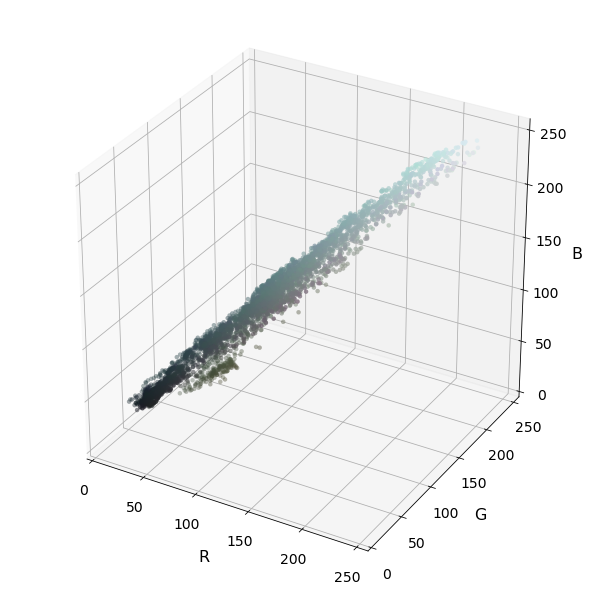

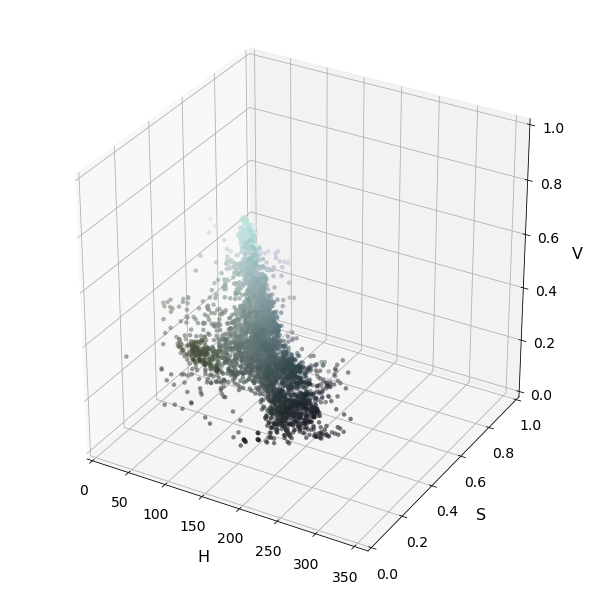

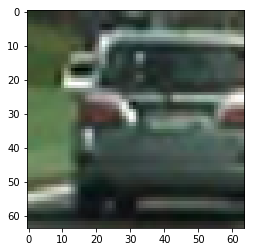

356.25


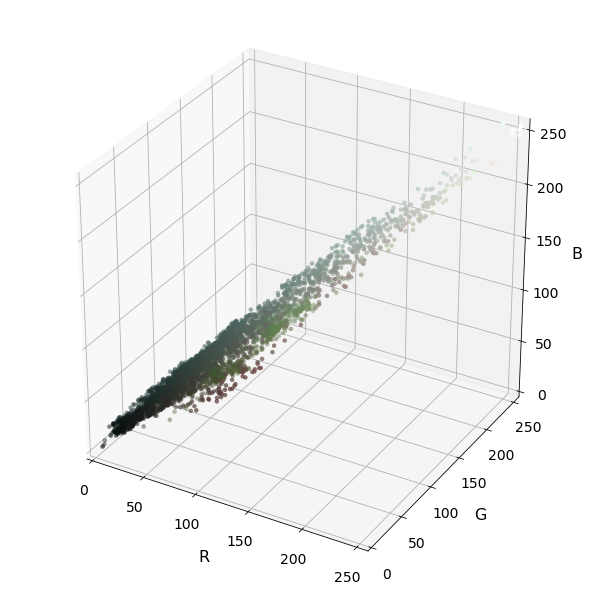

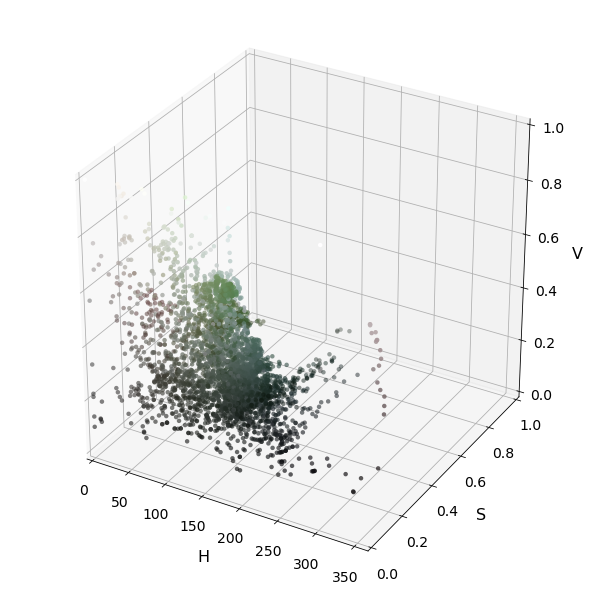

In [48]:
images = glob.glob('vehicles/**/*.png')
for img_path in images[0:5]:
    img=mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = img_small*255  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_RGB2HSV)
    img_small_rgb = img_small  # scaled to [0, 1], only for plotting
    print(np.max(img_small_HSV[:,:,0]))
    # Plot and show
    plot3d(img_small_RGB, img_small_rgb)
    plt.show()

    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"),axis_limits=[(0, 360), (0, 1.0), (0, 1.0)])
    plt.show()

# Seaborn Feature Exploration

In [2]:
import seaborn as sns
import pandas as pd
from scipy import stats, integrate

In [5]:
#import sample of car and non-car images
images = glob.glob('vehicles/**/*.png')
non_images = glob.glob('non-vehicles/**/*.png')
car_image=[]
noncar_image=[]
hog_car_features=[]
hog_noncar_features=[]
flat_car_images=[]
flat_non_images=[]
car=[]
non_car=[]
for img_path in images[0:100]:
    image=mpimg.imread(img_path)
    org_image=np.copy(image)
    image=cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    car_image.append(image)
    flat_car_images.append(image.ravel())
    gray = cv2.cvtColor(org_image, cv2.COLOR_RGB2GRAY)
    gray=cv2.resize(gray, (64,64))
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    
    car.append(1)
for img_path in non_images[0:100]:
    image=mpimg.imread(img_path)
    org_image=np.copy(image)
    image=cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    noncar_image.append(image)
    flat_non_images.append(image.ravel())
    gray = cv2.cvtColor(org_image, cv2.COLOR_RGB2GRAY)
    gray=cv2.resize(gray, (64,64))
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2

    non_car.append(1)

In [119]:
flat_images = np.vstack((flat_car_images, flat_non_images)).astype(np.float64)
hog_features = np.vstack((hog_car_features, hog_noncar_features)).astype(np.float64)
image_type=np.hstack((car, non_car))
images_array=np.vstack((car_image, noncar_image)).astype(np.float64)
print(images_array.ravel().shape)
print(image_type.shape)

(2457600,)
(200,)


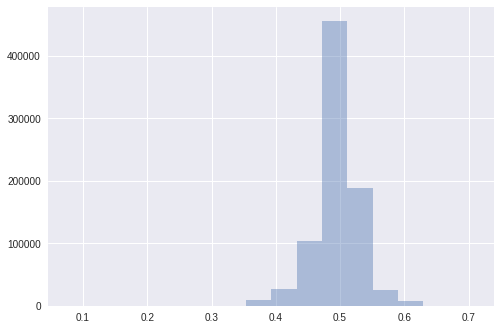

In [120]:
sns.set(color_codes=True)
sns.distplot(images_array[:,:,:,2].ravel(),bins=16,kde=False)
plt.show()

In [6]:

car_channel0=np.array(car_image)[:,:,:,0].ravel()
car_channel1=np.array(car_image)[:,:,:,1].ravel()
car_channel2=np.array(car_image)[:,:,:,2].ravel()

ncar_channel0=np.array(noncar_image)[:,:,:,0].ravel()
ncar_channel1=np.array(noncar_image)[:,:,:,1].ravel()
ncar_channel2=np.array(noncar_image)[:,:,:,2].ravel()
y = np.hstack((np.ones(len(car_channel0)), np.zeros(len(ncar_channel0))))
x0 = np.hstack((car_channel0, ncar_channel0))
x1 = np.hstack((car_channel1, ncar_channel1))
x2 = np.hstack((car_channel2, ncar_channel2))


In [7]:
sns.jointplot(x=car_channel1,y=car_channel2,color='y',marginal_kws=dict(bins=20, rug=True))
sns.jointplot(x=ncar_channel1,y=ncar_channel2,color='g',marginal_kws=dict(bins=20, rug=True))
sns.jointplot(x=car_channel0,y=car_channel2,color='y',marginal_kws=dict(bins=20, rug=True))
sns.jointplot(x=ncar_channel0,y=ncar_channel2,color='g',marginal_kws=dict(bins=20, rug=True))
sns.jointplot(x=car_channel0,y=car_channel1,color='y',marginal_kws=dict(bins=20, rug=True))
sns.jointplot(x=ncar_channel0,y=ncar_channel1,color='g',marginal_kws=dict(bins=20, rug=True))
plt.show()

KeyboardInterrupt: 

In [184]:
images = glob.glob('vehicles/**/*.png')
non_images = glob.glob('non-vehicles/**/*.png')
hog_car0=[]
hog_noncar0=[]
hog_car1=[]
hog_noncar1=[]
hog_car2=[]
hog_noncar2=[]
for img_path in images:
    image=mpimg.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #gray=image
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features0 = get_hog_features(gray[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True)
    features1 = get_hog_features(gray[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True)
    features2 = get_hog_features(gray[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True)
    hog_car0.append(features0)
    hog_car1.append(features1)
    hog_car2.append(features2)
for img_path in non_images:
    image=mpimg.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #gray=image
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features0 = get_hog_features(gray[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True)
    features1 = get_hog_features(gray[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True)
    features2 = get_hog_features(gray[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True)
    hog_noncar0.append(features0)
    hog_noncar1.append(features1)
    hog_noncar2.append(features2)
car_hog0=np.array(hog_car0).ravel()
car_hog1=np.array(hog_car1).ravel()
car_hog2=np.array(hog_car2).ravel()

ncar_hog0=np.array(hog_noncar0).ravel()
ncar_hog1=np.array(hog_noncar1).ravel()
ncar_hog2=np.array(hog_noncar2).ravel()
y_hog = np.hstack((np.ones(len(hog_car0)), np.zeros(len(hog_noncar0))))


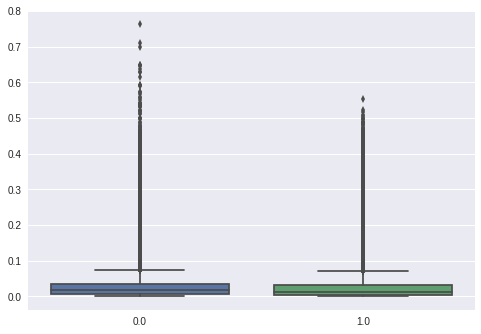

In [132]:
sns.boxplot(x=y_hog,y=hog)
plt.show()

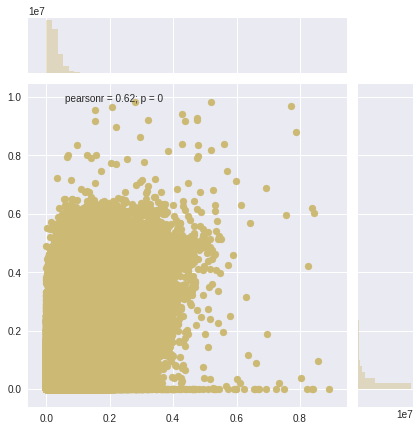

KeyboardInterrupt: 

In [185]:
sns.jointplot(x=car_hog1,y=car_hog2,color='y')
sns.jointplot(x=ncar_hog1,y=ncar_hog2,color='g')
sns.jointplot(x=car_hog0,y=car_hog2,color='y')
sns.jointplot(x=ncar_hog0,y=ncar_hog2,color='g')
sns.jointplot(x=car_hog0,y=car_hog1,color='y')
sns.jointplot(x=ncar_hog0,y=ncar_hog1,color='g')
plt.show()

In [2]:
images = glob.glob('vehicles/**/*.png')
non_images = glob.glob('non-vehicles/**/*.png')
print(len(images))
print(len(non_images))

8792
8968
